In [11]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_log():
    f = open('./logs/log.txt', 'r')
    lines = f.readlines()
    f.close()
    
    #eps, gamma, lr, step_reward, reward, moves, traps, energy, time
    lines = list( map(lambda x: x.strip().split(), lines) )
    lines = list( map(lambda x: list(map(float, x) ), lines) )
    cnt = len(lines)
    lines = [x for x in lines if len(x)==len(lines[1])]
    cnt -= len(lines)
    
    df = pl.DataFrame(lines,
                      schema = {"eps":pl.Float32, "gamma":pl.Float32,
                                "lr":pl.Float32, "step_reward":pl.Float32,
                                "reward":pl.Float32, "moves":pl.Int32,
                                "traps":pl.Int32, "energy":pl.Int32,
                                "time":pl.Float32})
    
    print(f"found {cnt} invalid lines ")
    
    return df
    
    

In [16]:
#custom format
def c_f(d,k):
    if k == 'eps':
        return f"{d[k][0]:.3e}"
    elif k == 'gamma':
        return f"{d[k][0]:.3e}"
    elif k == 'lr':
        return f"{d[k][0]:.3e}"
    elif k == 'step_reward':
        return f"{d[k][0]:.1f}"
        

In [33]:
def plot_resultVShp(df, hp, ix):

    hps = ["eps", "gamma", "lr", "step_reward"]
    
    df = df.group_by(
    [x for x in hps if x != hp]).agg(
        pl.col(hp), pl.col("reward"), pl.col("moves"), pl.col("traps"), pl.col("energy"), pl.col("time") )

    if ix is None:
        ix = np.random.randint(0,df.shape[0])
    
    data = df[ix,]
    d = data[ : , :3 ].to_dict()
    
    title = f"ix: {ix} | " + " | ".join([ f"{k} : {c_f(d,k)}" for k in d.keys()])
    
    
    for y in ["reward", "moves", "traps", "energy", "time"]:
        fig = plt.figure(figsize=(7,5))
        ax = fig.subplots(1,1)
        ax.set_xlabel(hp)
        ax.set_ylabel(y)
        ax.set_title(title)
        ax.plot(data[hp][0], data[y][0], c='blue', marker='*', mfc='red', mec='red')

    
    

In [5]:
df = read_log()

found 8 invalid lines 


/usr/lib/python3.10/functools.py:889: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  return dispatch(args[0].__class__)(*args, **kw)


In [7]:
df.describe()

statistic,eps,gamma,lr,step_reward,reward,moves,traps,energy,time
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1483.0,1483.0,1483.0,1483.0,1483.0,1483.0,1483.0,1483.0,1483.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.032569,0.544842,0.501996,-5.355361,480.573151,55.221173,0.000674,8.091706,0.884954
"""std""",0.037416,0.284873,0.31594,3.688232,123.378311,58.394763,0.025967,2.540831,0.720403
"""min""",0.001,0.1,0.01,-10.0,160.0,17.0,0.0,2.0,0.253793
"""25%""",0.005,0.3,0.23,-10.0,400.0,19.0,0.0,6.0,0.350131
"""50%""",0.01,0.5,0.45,-5.0,455.0,27.0,0.0,7.0,0.582332
"""75%""",0.05,0.8,0.78,-1.0,552.0,63.0,0.0,10.0,1.354573
"""max""",0.1,1.0,1.0,-1.0,816.0,493.0,1.0,15.0,7.864358


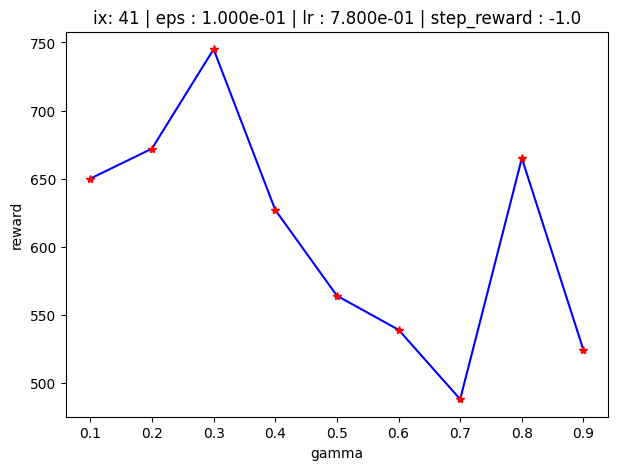

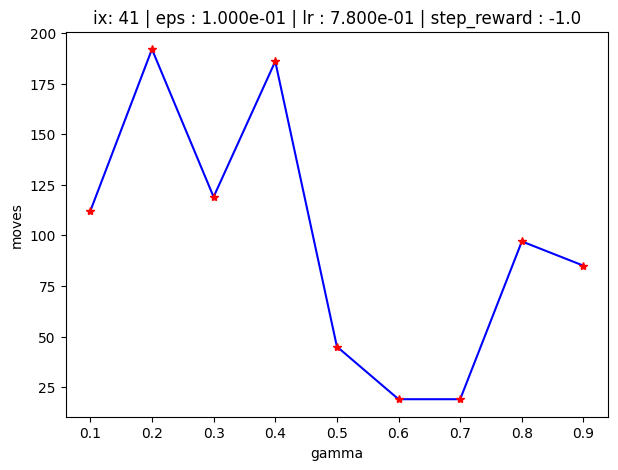

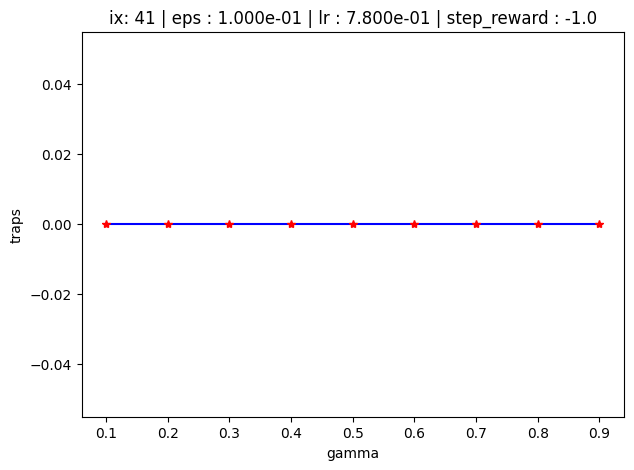

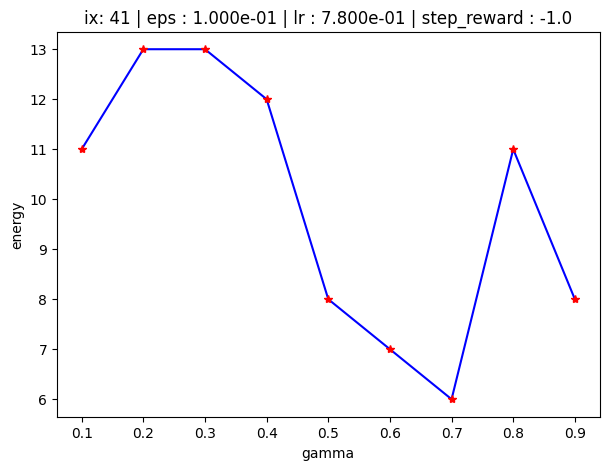

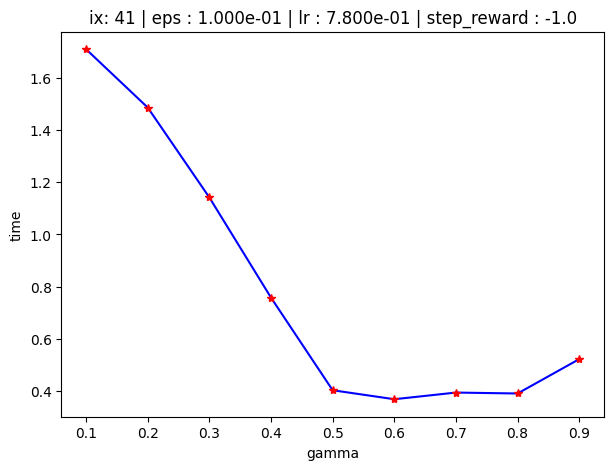

In [40]:
plot_resultVShp(df, "gamma", None)